<a href="https://colab.research.google.com/github/akshayayenka/Bangalore-House-Price-Prediction/blob/main/bangalore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Displaying the dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Size of the dataset

In [ ]:
df.shape

(13320, 9)

Information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


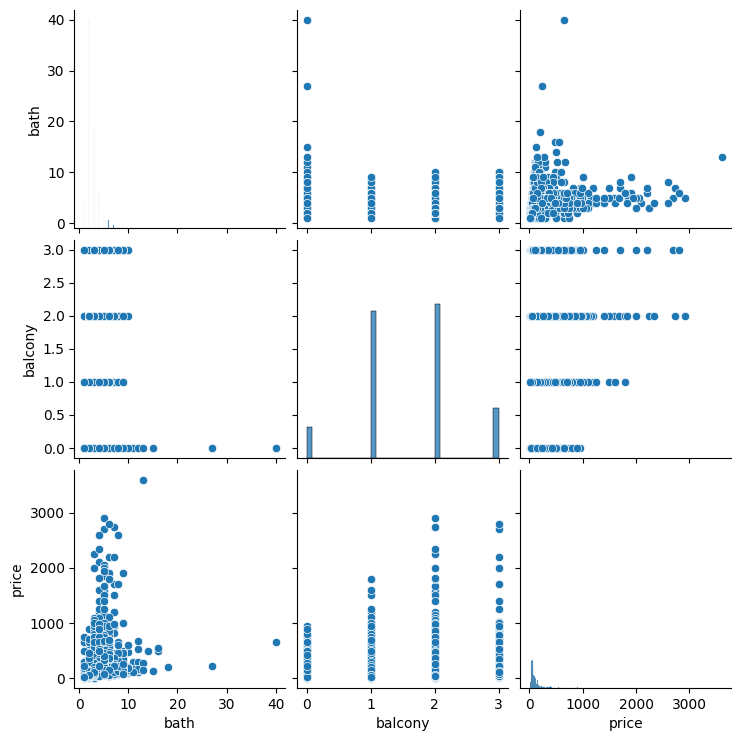

In [ ]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

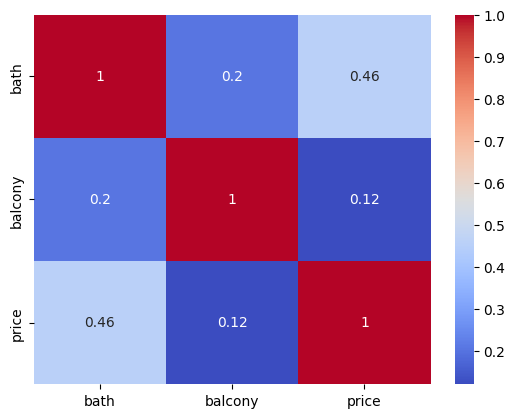

In [ ]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [ ]:
columns_to_drop=['area_type','availability','society','balcony']
df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [ ]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Value counts of each feature

In [ ]:
for column in df.columns:
  print(df[column].value_counts())
  print('*'*20)

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Be

Number of null values in the dataset

In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Value counts of 'Location'

In [ ]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

Replacing null values with 'Whitefield'(Mode of Location)

In [ ]:
df['location']=df['location'].fillna('Whitefield')

Value counts of 'Size'



In [ ]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

Replacing null values with '2 BHK'

In [ ]:
df['size']=df['size'].fillna('2 BHK')

Replacing null values with mean of 'Bath'

In [ ]:
avg_bath=df['bath'].astype('float').mean()
df['bath']=df['bath'].fillna(avg_bath)


Information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


Converting categorical data of size feature to numerical datatype

In [ ]:
df['bhk'] = df['size'].str.split().str[0]
df['bhk'] = pd.to_numeric(df['bhk'], errors='coerce').astype('Int64')
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13320, dtype: Int64

In [ ]:
df.drop('size',axis=1,inplace=True)

Boxplot of 'bhk'

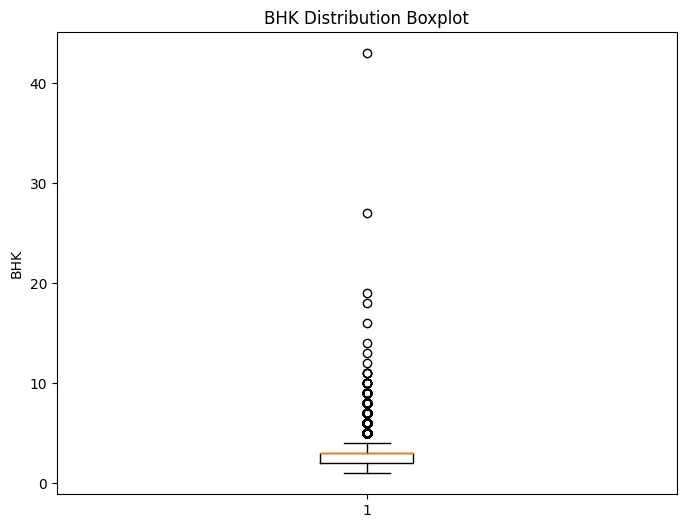

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df['bhk'].dropna())
plt.title('BHK Distribution Boxplot')
plt.ylabel('BHK')
plt.show()

Problem with the 'total_sqft' feature because it not only contains numerical values also has some data in the form of ranges

In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Function to convert range into numerical type by finding mean

In [ ]:
def convertRange(x):
  temp=x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df['total_sqft']=df['total_sqft'].apply(convertRange)
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [ ]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


Price per square feet

In [ ]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [ ]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.0,1.327400e+04
mean,1559.626694,2.692610,112.565627,2.802778,7.907501e+03
std,1238.405258,1.337777,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.0,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.0,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.0,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.0,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.0,1.200000e+07


In [ ]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

All the extra spaces before and after are removed



In [ ]:
df['location']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts()
location_count

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

One hot encoding cant be done for all the 1294 different types of values so all the values of the feature which occurs less than 10 are replaced with others

In [ ]:
loc_count_less_10=location_count[location_count<=10]
loc_count_less_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [ ]:
df['location']=df['location'].apply(lambda x: 'other' if x in loc_count_less_10 else x)


In [ ]:
df['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.0,1.327400e+04
mean,1559.626694,2.692610,112.565627,2.802778,7.907501e+03
std,1238.405258,1.337777,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.0,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.0,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.0,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.0,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.0,1.200000e+07


In [ ]:
df['total_sqft'].isnull().sum()

46

In [ ]:
avg_sqft=df['total_sqft'].astype('float').mean()
df['total_sqft']=df['total_sqft'].fillna(avg_sqft)

In [ ]:
df['bhk'].isnull().sum()

0

In [ ]:
(df['total_sqft']/df['bhk']).describe()

count       13320.0
mean     575.574751
std      388.520811
min            0.25
25%      473.333333
50%           552.5
75%           625.0
max         26136.0
dtype: Float64

In [ ]:
df=df[((df['total_sqft'])/(df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12572.000000,12572.000000,12572.000000,12572.0,12530.000000
mean,1594.447825,2.563996,111.466738,2.650811,6303.979357
std,1259.164179,1.078052,151.965217,0.977557,4162.237981
min,300.000000,1.000000,8.440000,1.0,267.829813
25%,1118.000000,2.000000,49.000000,2.0,4210.526316
50%,1300.000000,2.000000,70.000000,3.0,5294.117647
75%,1700.000000,3.000000,115.000000,3.0,6916.666667
max,52272.000000,16.000000,3600.000000,16.0,176470.588235


In [ ]:
df.shape

(12572, 6)

Max value is surely an outlier

In [ ]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
import numpy as np
def remove_outliers_sqft(df):
  df_output=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    gen_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_output=pd.concat([df_output,gen_df],ignore_index=True)
  return df_output
df=remove_outliers_sqft(df)
df.describe()





,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.0,10301.000000
mean,1508.440608,2.475467,91.286372,2.574896,5659.062876
std,880.694214,0.978960,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.0,1250.000000
25%,1110.000000,2.000000,49.000000,2.0,4244.897959
50%,1286.000000,2.000000,67.000000,2.0,5175.600739
75%,1650.000000,3.000000,100.000000,3.0,6428.571429
max,30400.000000,16.000000,2200.000000,16.0,24509.803922


In [ ]:
def bhk_outlier_remover(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [ ]:
df=bhk_outlier_remover(df)

In [ ]:
df.shape

(7361, 6)

In [ ]:
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2,5833.333333
10293,other,1800.0,1.0,200.0,1,11111.111111
10296,other,1353.0,2.0,110.0,2,8130.081301
10297,other,812.0,1.0,26.0,1,3201.970443


In [ ]:
df.drop('price_per_sqft',axis=1,inplace=True)

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
df.to_csv('Cleaned_data.csv')


In [ ]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
x=df.drop(columns=['price'])
y=df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(5888, 4)
(1473, 4)


In [ ]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [ ]:
scaler=StandardScaler()

In [ ]:
lr=LinearRegression()

In [ ]:

pipe=make_pipeline(column_trans,scaler,lr)

In [ ]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_lr=pipe.predict(x_test)

In [ ]:
r2_score(y_test,y_pred_lr)

0.8249229187595896